# Disease Prediction

This script has nothing to do with a NLP part, it is a normal classification algorithm. For our purpose we decided to use a Decision tree.

### Imports

In [3]:
#import standard + support libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

#import machine learning libs
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


#import for ignoring any warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Data Processing

In [4]:
df = pd.read_csv('Training.csv')

df = df.drop('fluid_overload.1', axis=1)

In [5]:
columns = list(df.columns)[:-1]
x = df[columns]
y = df['prognosis']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


### Model

#### Find optimal paramter for Decicion Tree

In [8]:
#Find the optimal max_depth for the decision tree

def optimum(x_train, y_train, x_test, y_test): 
    
    train_errors = []
    test_errors = []
    depths = list(range(1,51))
    
    
    #try every depth
    for depth in depths: 
        
        model = DecisionTreeClassifier(splitter='random', max_depth=depth)
        
        model.fit(x_train, y_train)
        
        
        
        learning_error = 1 - model.score(x_train, y_train) 
        train_errors.append(learning_error)
        
        testing_error = 1 - model.score(x_test, y_test)        
        test_errors.append(testing_error)
        
        #get best depth of decision tree
        best_depth = depths[np.argmin(test_errors)]
    
    return depths, best_depth, train_errors, test_errors

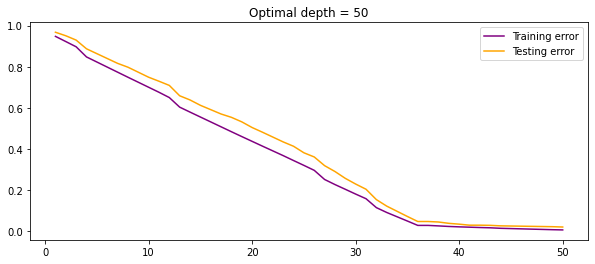

<Figure size 432x288 with 0 Axes>

In [9]:
depths, best_depth, train_errors, test_errors = optimum(x_train, y_train, x_test, y_test)


#plot train and test error for every tested depth of the decicion tree
fig = plt.figure(figsize=(10,4))
plt.title(f"Optimal depth = {best_depth}")
plt.plot(depths, train_errors, c='purple', label='Training error')
plt.plot(depths, test_errors, c='orange', label='Testing error')
plt.legend()


plt.show()
plt.savefig('DecisionTree.png')

Note that at a depth of around 36, there are no real improvements, so choosing depths greater than what we chose here (50) is unnecessary as it would lead to overfitting depending on the test data you choose.

#### Model Fit

In [10]:
#train
CLF  = DecisionTreeClassifier(splitter='random', max_depth=50)
clf = CLF.fit(x_train,y_train)

In [39]:
#validation
clf.score(x_test,y_test)

0.9796747967479674

One remark on the goodness of the fit: The decision tree appears to be very good when it gets every symptom of a disease. However it does not always get every disease so the train data might have to get manipulated so that for every entry of a disease it should get all the combinations of the symptoms it can have as a extra entry. Furthermore there is a problem with the diseases as every "instance" of a disease shows different symptoms depending on the person, which makes it hard for the model to predict the right disease.

### Save fitted model and list of all symptoms

In [41]:
with open('fitted_model.pickle', 'wb') as model_file:
    model_final = pickle.dump(clf, model_file)

In [42]:
columns = list(df.columns)[:-1]

In [14]:
with open('all_symptoms.pickle', 'wb') as data_file:
    symptoms_list = pickle.dump(columns, data_file)